In [9]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, freqz

In [10]:
# import sample data 
signal, sr = librosa.load("./Bmr025.10s.wav", sr = None)

# The original parameters 
melspect = librosa.feature.melspectrogram(signal, n_fft = 512, hop_length = 256, win_length = 512)

C:\Users\Felix\AppData\Local\Temp\ipykernel_7812\3035980232.py:3: FutureWarning: Pass y=[-0.00769043 -0.00720215 -0.00726318 ...  0.06524658  0.06817627
  0.06634521] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect = librosa.feature.melspectrogram(signal, n_fft = 512, hop_length = 256, win_length = 512)


[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

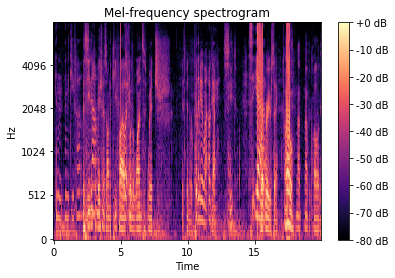

In [11]:
# Graphing the spectrogram with the original parameters 
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(melspect, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

In [24]:
# Calculate window length
win_len_time_s = 0.025
sampling_frequency = 16000

win_len = win_len_time_s / (1 / sampling_frequency)
win_len

400.0

# LOOK HERE FOR THE PARAMETERS TO USE

C:\Users\Felix\AppData\Local\Temp\ipykernel_7812\1771078242.py:2: FutureWarning: Pass y=[-0.00769043 -0.00720215 -0.00726318 ...  0.06524658  0.06817627
  0.06634521] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect_prosody = librosa.feature.melspectrogram(signal, sr = sr, n_fft = 400, hop_length = 200, win_length = 400, fmax = 400, n_mels = 16)


[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

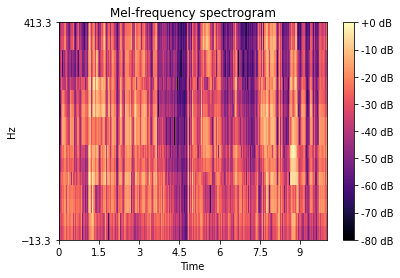

In [23]:
# Modifying parameters  for downsampling and tracking prosody 
melspect_prosody = librosa.feature.melspectrogram(signal, sr = sr, n_fft = 400, hop_length = 200, win_length = 400, fmax = 400, n_mels = 16)
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(melspect_prosody, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         hop_length=200, fmax=400, ax=ax,
                         win_length=400)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

The rest is not necessary -- tried the low-pass filter before I figured out that I can just limit the max frequency in the melspectrogram function...
Go to the end to see comparison between Praat generated results and librosa results 

In [13]:

# Low-pass filter the signal 

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

order = 6
fs = sr    
cutoff = 350.0   

y = butter_lowpass_filter(signal, cutoff, fs, order)


In [14]:
# Calculate window length
0.025/(1/16000)

400.0

C:\Users\Felix\AppData\Local\Temp\ipykernel_7812\4012176112.py:1: FutureWarning: Pass y=[-6.26923521e-10 -7.77732735e-09 -4.82264370e-08 ...  3.13790841e-02
  3.12295071e-02  3.07605248e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspect_lp = librosa.feature.melspectrogram(y, sr = sr, n_fft = 400, hop_length = 200, win_length = 400, fmax=400, n_mels=16)


[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

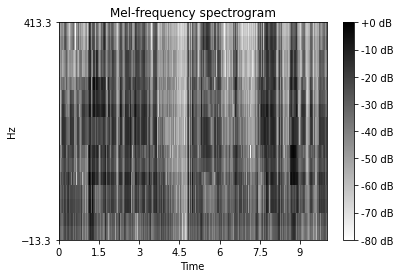

In [15]:
melspect_lp = librosa.feature.melspectrogram(y, sr = sr, n_fft = 400, hop_length = 200, win_length = 400, fmax=400, n_mels=16)
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(melspect_lp, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         hop_length=200, fmax=400, ax=ax,
                         cmap='gray_r', win_length=400)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

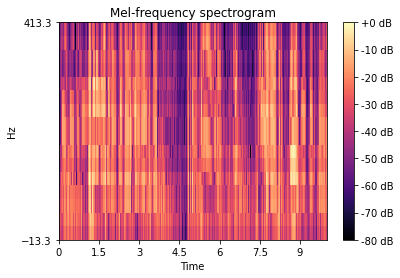

In [18]:
fig, ax = plt.subplots()
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         hop_length=200, fmax=400, ax=ax,
                         win_length=400)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

# Comparing spectrograms librosa vs Praat
![alt text](compare_spec.png "Comparing spectrograms librosa vs Praat")

![alt text](praat_output.png "Praat output (big)")